**PHYS 105B FINAL PROJECT: GRID METHOD for TDSE in 1D BOX**
---

The grid method is an approach in numerical analysis where we divide the domains(s) we are interested in into chunks in order to evaluate and analyze the solutions in this structured approach. Here, we are going to use the grid method to solve the Time Dependant Schrodinger Equation (TDSE) in a 1-Dimensional Box, otherwise known as the "Infinite Square Well", named so because the potential energy is $V=0$ in the region we care about, and $V=∞$ everywhere else, effectively trapping the particle in a box. This gives us the equation:

$$ih̄ \frac{∂}{∂t}Ψ(x.t)= \frac{-h̄^2}{2m}\frac{∂^2}{∂x^2}Ψ(x,t)$$<br>
where our boundary conditions are given by: <br>
$$x ϵ [-L,L], Ψ(x=±L,t) = 0$$<br>

meaning that our particle $x$ is confined within a box that is $2L$ long, and the wavefunction(s) $\Psi$  are 0 at the borders of the box. <br>

Firstly, we'll want to discretize the position and time domains into grids of $N,M$ points, respectively, such that:

$$Δx = \frac{2L}{N}, Δt =\frac{T}{M}$$

 We can also use this opportunity to introduce our constants into our notebook. Notice that in the code, we defined $\Delta t$ in terms of $dx$ as well as a constant $D \sim \frac{h̄}{m}$ -- this will make more sense once we talk about stability analysis at the end, but for now, we can we chose this to allow our $N ∼ M$ for convenience.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Defining constants
hbar = 1.054e-31 #Reduced Planck's Constant in J*s
m = 9.109e-31 #Mass of Electron in kg
D = 1/5 #Approximately 2*hbar/m - See Stability Analysis for details
L = 1e-12 #Half-Length of box in meters : 1 nm
T = D*4*1e-27 #Duration of time to evolve, in seconds
N = int(1e3) #Number of points in space
n=1 #Quantum Number n: relates to energy levels and represents mode
E_n= (hbar**2*np.pi*2*n**2)/(2*m*(2*L)**2) #Discretized energy levels for an Infinite Square Well

#Discretize domains
dx = 2*L/N #spacing between position points - "step-size"
dt= D*dx**2#spacing between time points - See "Stability Analysis" to understand why we choose this!
M=int(T/dt) #amount of points in time

#Setting up Grid
x = np.linspace(-L,L,N) #x ranges between [-L,L]
t=np.linspace(0,T,M) #t ranges between [0,T]
t0=t[0]
psi0 = np.zeros(int(N),dtype = complex) #Creating an N-sized array for our wavefunction

**FINITE DIFFERENCE APPROXIMATION**:<br>
---
In order to find a numeric solution to this equation with the grid method, we will want to use the **Finite Difference Approximation** in order to estimate the second derivative of the wavefunction $\Psi$.  In our case, we can use the **Three-Point Central Difference Formula**:<br><br>

$$\frac{∂^2}{∂x^2}Ψ(x,t) ≈ \frac{-h̄^2}{2m}\frac{(Ψ(x+Δx,t)-2Ψ(x,t)+Ψ(x-Δx,t)}{Δx^2}$$

<br>

where the key idea with this equation is, as the name suggests, that we can estimate the the second derivative of the wave function based on 3 points: the wavefunction $\Psi$ itself, and then its two neighbors at a distance $±Δx$ away.
<br><br>
Plugging this into our original equation, we now have:<br><br>

$$ih̄ \frac{∂}{∂t}Ψ(x.t) = \frac{-h̄^2}{2m}\frac{(Ψ(x+Δx,t)-2Ψ(x,t)+Ψ(x-Δx,t)}{Δx^2}$$
<br>
<br>
Let's define how that would look like in python:

In [ ]:
#RHS of the above equation : Three-Point Central Difference
N=int(1e3)
dx2psi0=np.zeros(N,dtype=complex) #Creating an N-sized array for the approximation of the second-derivaive
for i in range(1,N-1):
  dx2psi0[i] = (-hbar**2/(2*m))*(psi0[i+1]+2*psi0[i]+psi0[i-1])/dx**2


If you run the above cell *right now*, you'll get a complex array full of zeros. This part is intentional, as we have described the derivative in terms of discrete wavefunctions $\Psi$, but *we haven't actually described $\Psi$ yet*. For now, the key concept to notice is that we defined the second spacial derivative of our wave function by using $Ψ$ for each *i* in our range, taking into account $± i$. We also excluded the first and last elements in the array due to our intial conditions: if $Ψ = 0$ at $±L$, then so will its derivatives.
<br><br>


---


**INTRODUCING INITIAL CONDITIONS**:<br>
---

Let's define a starting point $\Psi$ function.<br>
Actually, since time and space are independent of eachother, we can use separation of variables to define our wavefunction $Ψ = ψ(x)ϕ(t)$. Analytically solving the Schrodiner Equation for the position part, the solution to the eigenvalue equation $\frac{-h̄^2}{2m}\frac{∂^2}{∂x^2}ψ(x)=Eψ(x)$ (given our boundary conditions) is the equation:<br><br>

$$ψ(x) = Acos(\frac{n π}{2L} x)$$
<br>
While $n=0$ is trivial, a look at $n=1$ gives us <br>
$$ψ_{n=1}(x) = Acos(\frac{π}{2L} x)$$

<br>

where A is our normalization constant.
 <br>
<br>

Let's plug this into $\Psi$ as our initial value to get things rolling. <br>
In the plot below, you'll be able to see the $n=1$ solution for the Time-Independent Schrodinger Equation in orange, with the approximation of it's second derivative in blue.
<br>

As expected, changing the value of $n$ will give us the different energy states.
Notice that for our chosen wavefunctio, $x ϵ [-L,L]$, $n$ can only be odd integers in order to respect our boundary conditions.

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


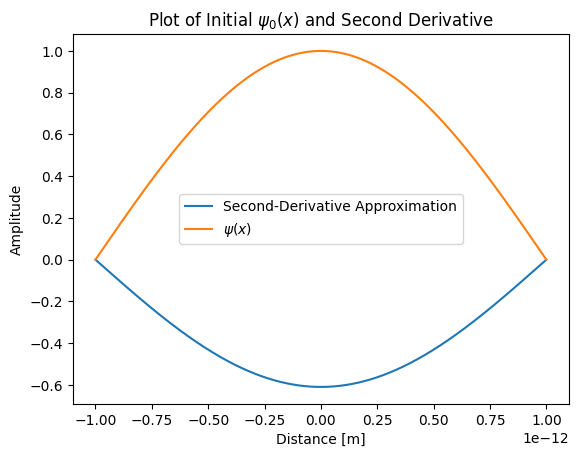

In [ ]:
#Defining Initial Wavefunction for Space
psi0 = np.zeros(N,dtype = complex) #Creating N-sized array
psi0[1:N-1] = np.cos(np.pi*n*x[1:N-1]/(2*L)) #We want psi[0] and psi[N] to remain 0 - we apply the wavefunction to everywhere else

#Three Point Central Difference Formula
dx2psi1=np.zeros(N,dtype=complex) #Creating an N-sized array for the approximation
for i in range(1,N-1):
  dx2psi0[i] = (-hbar**2/(2*m))*(psi0[i+1]+2*psi0[i]+psi0[i-1])/dx**2

plt.plot(x,1e2*(dx2psi0),label = 'Second-Derivative Approximation')
plt.plot(x,psi0,label = '$\psi(x)$')
plt.xlabel('Distance [m]')
plt.ylabel('Amplitude')
plt.title('Plot of Initial $\psi_0(x)$ and Second Derivative')
plt.legend()
plt.show()

**INITIAL CONDITIONS CONTINUED - TIME**:<br>

---

Like with the spacial term, we will need to define an initial $ϕ(t=t_0)$ to make use of our numerical solution. We can set $t_0 =0$ for convience, and then from solving the eigenvalue equation: <br>
$$ih̄\frac{∂}{∂t}ϕ(t) = Eϕ(t)$$
<br>
Where we can get: <br>
$$ϕ(t)= e^{-i\frac{E_n}{h̄}t}$$
<br>
where $E_n =\frac{n^2π^2h̄^2}{2m(2L)^2}$ is the discrete value of energy.

Recalling that:<br>
$$Ψ(x,t) = ψ(x)ϕ(t)$$
<br>
We can write down our full initial condition for$\Psi_0(x,t=t_0)$. Of course, for $t_0=0$, this is just $ϕ=1, \Psi(x,t=0)=\psi(x)$


---

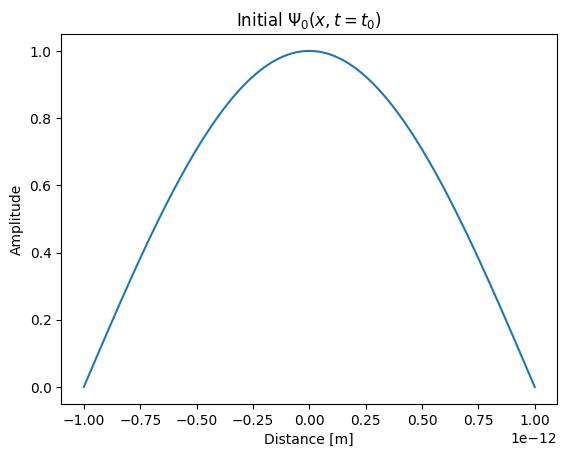

In [ ]:
n=1
PSI1 = np.zeros((N,M),dtype = complex) #Creating  N,M-sized columns for space and time
ps1= np.cos(n*np.pi*x/(2*L)) #Spacial Piece
phi1 = np.exp(1j*-E_n/hbar*t0) #Time Piece @t=t0
PSI1[:,0]= ps1*phi1#Initial Equation at t=0=t0
plt.plot(x,(PSI1[:,0]))
plt.title('Initial $\Psi_0(x,t=t_0)$')
plt.xlabel('Distance [m]')
plt.ylabel('Amplitude')
plt.show()

**PROPAGATION IN TIME**:<br>
---

On the LHS of this equation, we can see that there is still a first-order time derivative. Similarly, as part of the grid method, we will also have to discretize this part of the wavefucntion, except this time will use the **Forward Difference Formula**:<br>
<br>
$$\frac{∂}{∂t}Ψ(x,t) ≈ \frac{Ψ(x,t+Δt) - Ψ(x,t)}{Δt}$$
<br>
<br>
As the name suggests, this equation simply estimate a first-order time derivative by taking the difference between our wavefunction at two neighboring times, and dividing by the time-step-size. In essence, this equation is analogous to finding the velocity of an object by measuring the time $Δt$ it took for a particle to go from Point A to Point B: <br><br>

$$\frac{d}{dt}x ≈ \frac{x_B-x_A}{Δt}=v$$

<br><br>
Now that we have our approximations in both the space and time domains, we can plug in the latter to our earlier equation to get: <br><br>

$$ih̄ \frac{Ψ(x,t+Δt) - Ψ(x,t)}{Δt} =\frac{-h̄^2}{2m}\frac{(Ψ(x+Δx,t)-2Ψ(x,t)+Ψ(x-Δx,t)}{Δx^2}$$
<br><br>

After solving for $ Ψ(x,t+Δt)$, we get:
<br><br>
$$Ψ(x,t+Δt) = Ψ(x,t) +Δt\frac{ih̄}{2m}\frac{(Ψ(x+Δx,t)-2Ψ(x,t)+Ψ(x-Δx,t)}{Δx^2}$$

<br><br>

This equation lets us time-evolve the wavefunction. Notice that the second term on the RHS is the same as the term from the Three Point Central Difference Formula, only multiplied by a factor of $\frac{\Delta t}{ih̄}$. This equation is essentially saying that we can find the next term of the wavefunction by adding our current term to the Central Difference Term multiplied by a scaling factor.

<br><br>
Given what we know, we can also write down our explicit answer for the Time Dependent Schrodinger Equation.<br><br>

$$Ψ(x,t+Δt) = Acos(\frac{nπ}{2L}x)e^{-i\frac{E_n}{h̄}(t)} +Δt\frac{ih̄}{2m}    \frac{Ae^{-i\frac{E_n}{h̄}(t)}(cos(\frac{nπ}{2L}(x+Δx)) -2cos(\frac{nπ}{2L}x)+cos(\frac{nπ}{2L}(x-Δx))}{Δx^2}$$

Let's finally write this in python:

In [ ]:
#Recalling that
n=1 #Ground state energy
PSI1 = np.zeros((N,M),dtype = complex) #Creating  N,M-sized columns for space and time
psi1= np.cos(n*np.pi*x/(2*L)) #Spacial Piece
phi1 = np.exp(1j*-E_n/hbar*t0) #Time Piece @t=t0
PSI1[:,0]= psi1*phi1#Initial Equation at t=0=t0


for j in range(M-1): #Temporal Updates to M -1 becauses we want to go up to j+1 = M
  for i in range(1,N-1): #Spacial Updates
    PSI1[i,j+1] = PSI1[i,j] + 1j*(hbar/(2*m))*(PSI1[i+1,j]-2*PSI1[i,j]+PSI1[i-1,j])/(dx**2)*dt


We can plot the probability distribution function below. Here, we can see that the particle is most likely to be in the center of the box, with the probability of the particle being in a position decreasing near the edges of the box, which is in line with our boundary conditions.

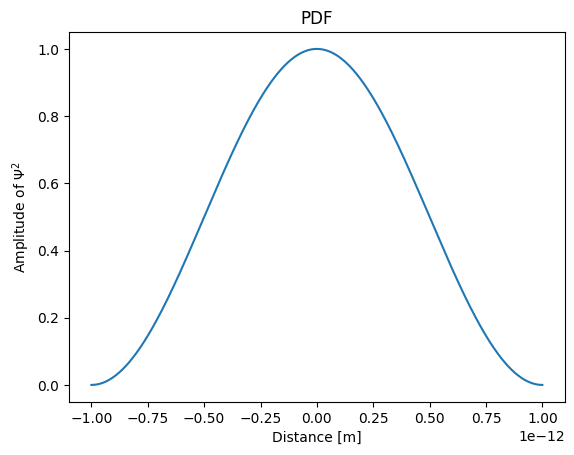

In [ ]:
import random
randomInt = random.randint(0,N) #for fun, let's choose a random point in time

plt.plot(x,np.abs(PSI1[:,randomInt])**2) #Absolute value and squared gives us the PDF

plt.title('PDF')
plt.xlabel('Distance [m]')
plt.ylabel('Amplitude of $\Psi^2$')
plt.show()

Of course, this is the probability density at a random point in time. But, how does the wavefunction look over time? Let's plot this below

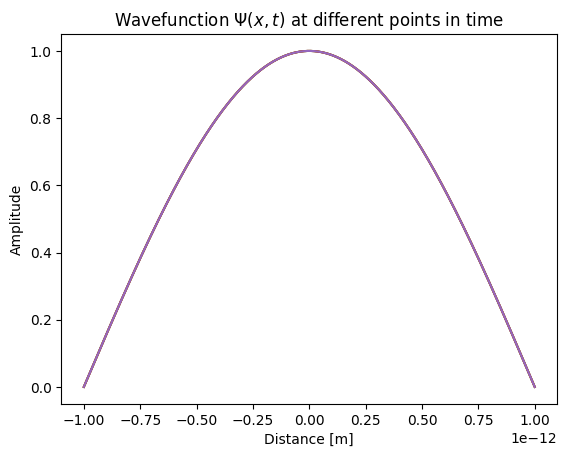

In [ ]:
plt.plot(x,(PSI1[:,0]),alpha=0.4)
plt.plot(x,PSI1[:,int(M/4)])
plt.plot(x,PSI1[:,int(M/2)])
plt.plot(x,PSI1[:,int(3*M/4)])
plt.plot(x,PSI1[:,M-1])
plt.xlabel('Distance [m]')
plt.ylabel('Amplitude')
plt.title('Wavefunction $\Psi(x,t) $ at different points in time')
plt.show()

In this code, you can see that for 5 points in time space across the range of $t ϵ [0,T]$ the wavefunction appear to be identical, at least in shape. But why is this? The answer lies in our initial conditons. <br><br>

Recall that we defined our inital spacial equation based on the solutions to the Schrodinger Equation, $$ψ(x) = Acos(\frac{n π}{2L} x)$$<br>

Because this is a valid spacial solution, the resulting complete SE $\Psi(x,t)$ is only propagating in phase! Essentially, the position of the particle is already in a place it *wants* to be in. And because this particular solution is stable, it appears identical across the x-axis for all $M$.

To better understand this, lets talk about stability conditions.

**VON NEUMAN STABILITY**
---
Recall our answer to the time-evolution SE:
$$ih̄ \frac{Ψ(x,t+Δt) - Ψ(x,t)}{Δt} =\frac{-h̄^2}{2m}\frac{(Ψ(x+Δx,t)-2Ψ(x,t)+Ψ(x-Δx,t)}{Δx^2}$$
<br><br>

Let's introduce our amplifaction factor $A$, defined as the ratio of the next time step to the current time step.Let's also change noation such that $Ψ(x,t)$ can be written as $Ψ_i^n$. <br>

$$A = \frac{Ψ^{n+1}_i}{Ψ^n_i} $$
<br>

If we substitute $G$ into our above equation, we get:

$$G - 1 = \frac{ih̄Δt}{Δx^2}(Ge^{ikx} -2G + Ge^{-ikx})$$

where $k= \frac{2πn}{2L}$ is the wavenumber, and of course $e$ is the spacial portion written with Euler's instead of sines and cosines. <br><br>

This equation can be rewritten as

$$1 - 2(\frac{ih̄Δt}{Δx^2})(1-cos(kdx)) ≤ |G|$$

In order for this to be stable, we need the amplification factor $|G| ≤ 1$.<br>
Since $1-cos(kdx)$ is always non-negative, that gives us

$$\frac{ih̄ Δt}{Δx^2} ≥ 0$$ or in other words,

$$Δt ≥ CΔx^2$$ where $C$ is a constant.

<br>

We can make a rough estimate about what $C$ is through unit analysis!
Since $t$ is in secondsand $x^2$ is in meters-squared, in order for this equation to make sense analytically, the only constants in this context that make sense would be $$C ∼ D \frac{h̄}{m}$$

where of course, $h̄$ is Planck's reduced constant and $m$ is the mass of the particle (in this case, an electron), and D is a new unitless constant for scaling. <br>

Given these equations, we can solve for a $Δt$ that will make our approximation via Central Difference Theoreom stable! As we did in this first section of this notebook. When $D=2$, $C ≈ \frac{1}{5}$.<br>

For completion, lets see what it looks like when we plot an *unstable* solution.

In [ ]:
#Unstable test

#Defining constants
hbar = 1.054e-31 #Reduced Planck's Constant in J*s
m = 9.109e-31 #Mass of Electron in kg
D = 1/5 #Approximately 2*hbar/m - See Stability Analysis for details - this is "C" in the notes
L = 1e-12 #Half-Length of box in meters : 1 nm

N = int(1e3) #Number of points in space
n=1 #Quantum Number n: relates to energy levels and represents mode
E_n= (hbar**2*np.pi*2*n**2)/(2*m*(2*L)**2) #Discretized energy levels for an Infinite Square Well

#Discretize domains
dx = 2*L/N #spacing between position points - "step-size"
dt= dx#spacing between time points - See "Stability Analysis" to understand why we choose this!
M=1000
T=dt*M


Here, we redefined the same constants from before, except thist time, we removed the factor of $C$ from $Δt,T$ and changed them such that $M$ and $N$ are still around the same order (for processing speed). Now, lets plot our propagated equations again.

In [ ]:
n=1 #Ground state energy
PSI1 = np.zeros((N,M),dtype = complex) #Creating  N,M-sized columns for space and time
psi1= np.cos(n*np.pi*x/(2*L)) #Spacial Piece
phi1 = np.exp(1j*-E_n/hbar*t0) #Time Piece @t=t0
PSI1[:,0]= psi1*phi1#Initial Equation at t=0=t0


for j in range(M-1): #Temporal Updates to M -1 becauses we want to go up to j+1 = M
  for i in range(1,N-1): #Spacial Updates
    PSI1[i,j+1] = PSI1[i,j] + 1j*(hbar/(2*m))*(PSI1[i+1,j]-2*PSI1[i,j]+PSI1[i-1,j])/(dx**2)*dt

<ipython-input-9-6d8501271179>:10: RuntimeWarning: overflow encountered in cdouble_scalars
  PSI1[i,j+1] = PSI1[i,j] + 1j*(hbar/(2*m))*(PSI1[i+1,j]-2*PSI1[i,j]+PSI1[i-1,j])/(dx**2)*dt
<ipython-input-9-6d8501271179>:10: RuntimeWarning: invalid value encountered in cdouble_scalars
  PSI1[i,j+1] = PSI1[i,j] + 1j*(hbar/(2*m))*(PSI1[i+1,j]-2*PSI1[i,j]+PSI1[i-1,j])/(dx**2)*dt


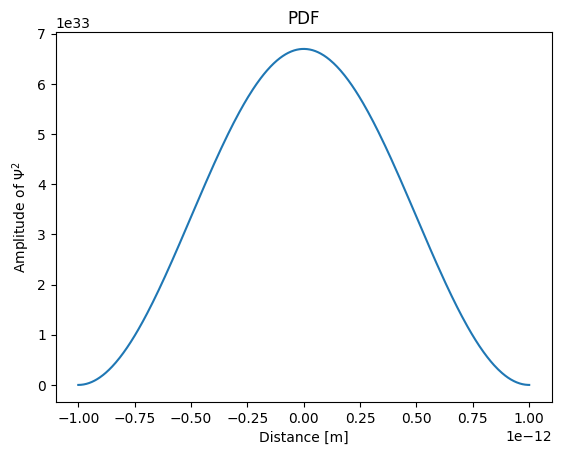

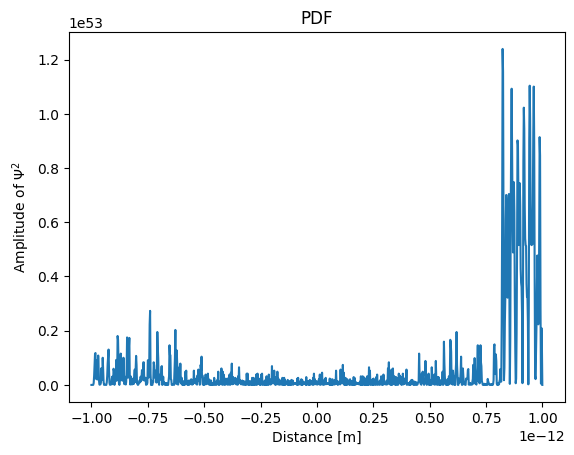

In [ ]:
#Unstable Plots

plt.plot(x,np.abs(PSI1[:,2])**2) #Second Element in M

plt.title('PDF')
plt.xlabel('Distance [m]')
plt.ylabel('Amplitude of $\Psi^2$')
plt.show()

plt.plot(x,np.abs(PSI1[:,3])**2) #Third Element in M Across X

plt.title('PDF')
plt.xlabel('Distance [m]')
plt.ylabel('Amplitude of $\Psi^2$')
plt.show()



Here, we plotted the second and third elements out of $M = 1000$. Notice how even with a difference as small as $Δt=2^-15$, the function climbs *expontentially fast*, and it's impossible to plot the highest terms as $M → 1000$ due to the integer overflow.